[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rycroft-group/math714/blob/main/b_fd_approx/fd_approx.ipynb)

In [1]:
# Necessity libraries
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, exp

# Optional: a library for plotting with LaTeX-like 
# styles nicer formatted figures
# Warning: need to have LaTeX installed
import scienceplots
plt.style.use(['science'])

# Finite difference approximation

## Test the second-order accuracy
This example tests the finite difference formula that we derive in class using the method of undetermined coefficients, 
$$
D_2 u(\bar{x}) = u'(\bar{x}) + \frac{h^2}{3} u'''(\bar{x}) + O(h^3),
$$
is indeed second-order accurate.

### Computing the error

In [2]:
# Define a function to numerically differentiate
# Choose one that has an exact solution for the first-derivative
def f(z):
    return exp(z)*sin(z)

# Initial step size, and position to evaluate the derivative at
h = 0.1
x = 1

# The exact derivative for error comparison
dfexact = exp(x)*(cos(x)+sin(x))

# Store the results for later analysis
results = []

# Terminate the while-loop when the step size is sufficiently small
while h > 1e-10:

    # Compute the derivative using the finite-difference stencil
    df = (f(x+2*h)+3*f(x)-4*f(x-h))/(6*h)

    # Print the numerical and exact derivatives,
    # and the magnitude of absolute error
    print(h, df, dfexact, abs(df-dfexact))

    # Store the results for later analysis
    results.append((h, df, dfexact, abs(df-dfexact)))

    # Divide the grid spacing by 2
    h *= 0.5

# Extract step sizes and absolute error values
h_values = [r[0] for r in results]
abserror_values = [r[3] for r in results]

0.1 3.749752312695583 3.7560492270947274 0.00629691439914426
0.05 3.7545847394648444 3.7560492270947274 0.001464487629883049
0.025 3.755695909863483 3.7560492270947274 0.00035331723124443215
0.0125 3.7559624423176525 3.7560492270947274 8.678477707491083e-05
0.00625 3.7560277204955614 3.7560492270947274 2.1506599165999063e-05
0.003125 3.7560438739283573 3.7560492270947274 5.353166370181128e-06
0.0015625 3.756047891725036 3.7560492270947274 1.3353696912687951e-06
0.00078125 3.756048893616631 3.7560492270947274 3.334780962482853e-07
0.000390625 3.756049143770117 3.7560492270947274 8.332461032267702e-08
0.0001953125 3.756049206270593 3.7560492270947274 2.082413441684139e-08
9.765625e-05 3.756049221889649 3.7560492270947274 5.205078590364565e-09
4.8828125e-05 3.7560492257883493 3.7560492270947274 1.306378116794349e-09
2.44140625e-05 3.7560492267584773 3.7560492270947274 3.362501388437522e-10
1.220703125e-05 3.756049227037389 3.7560492270947274 5.7338578329790835e-11
6.103515625e-06 3.756049

### Plotting the results

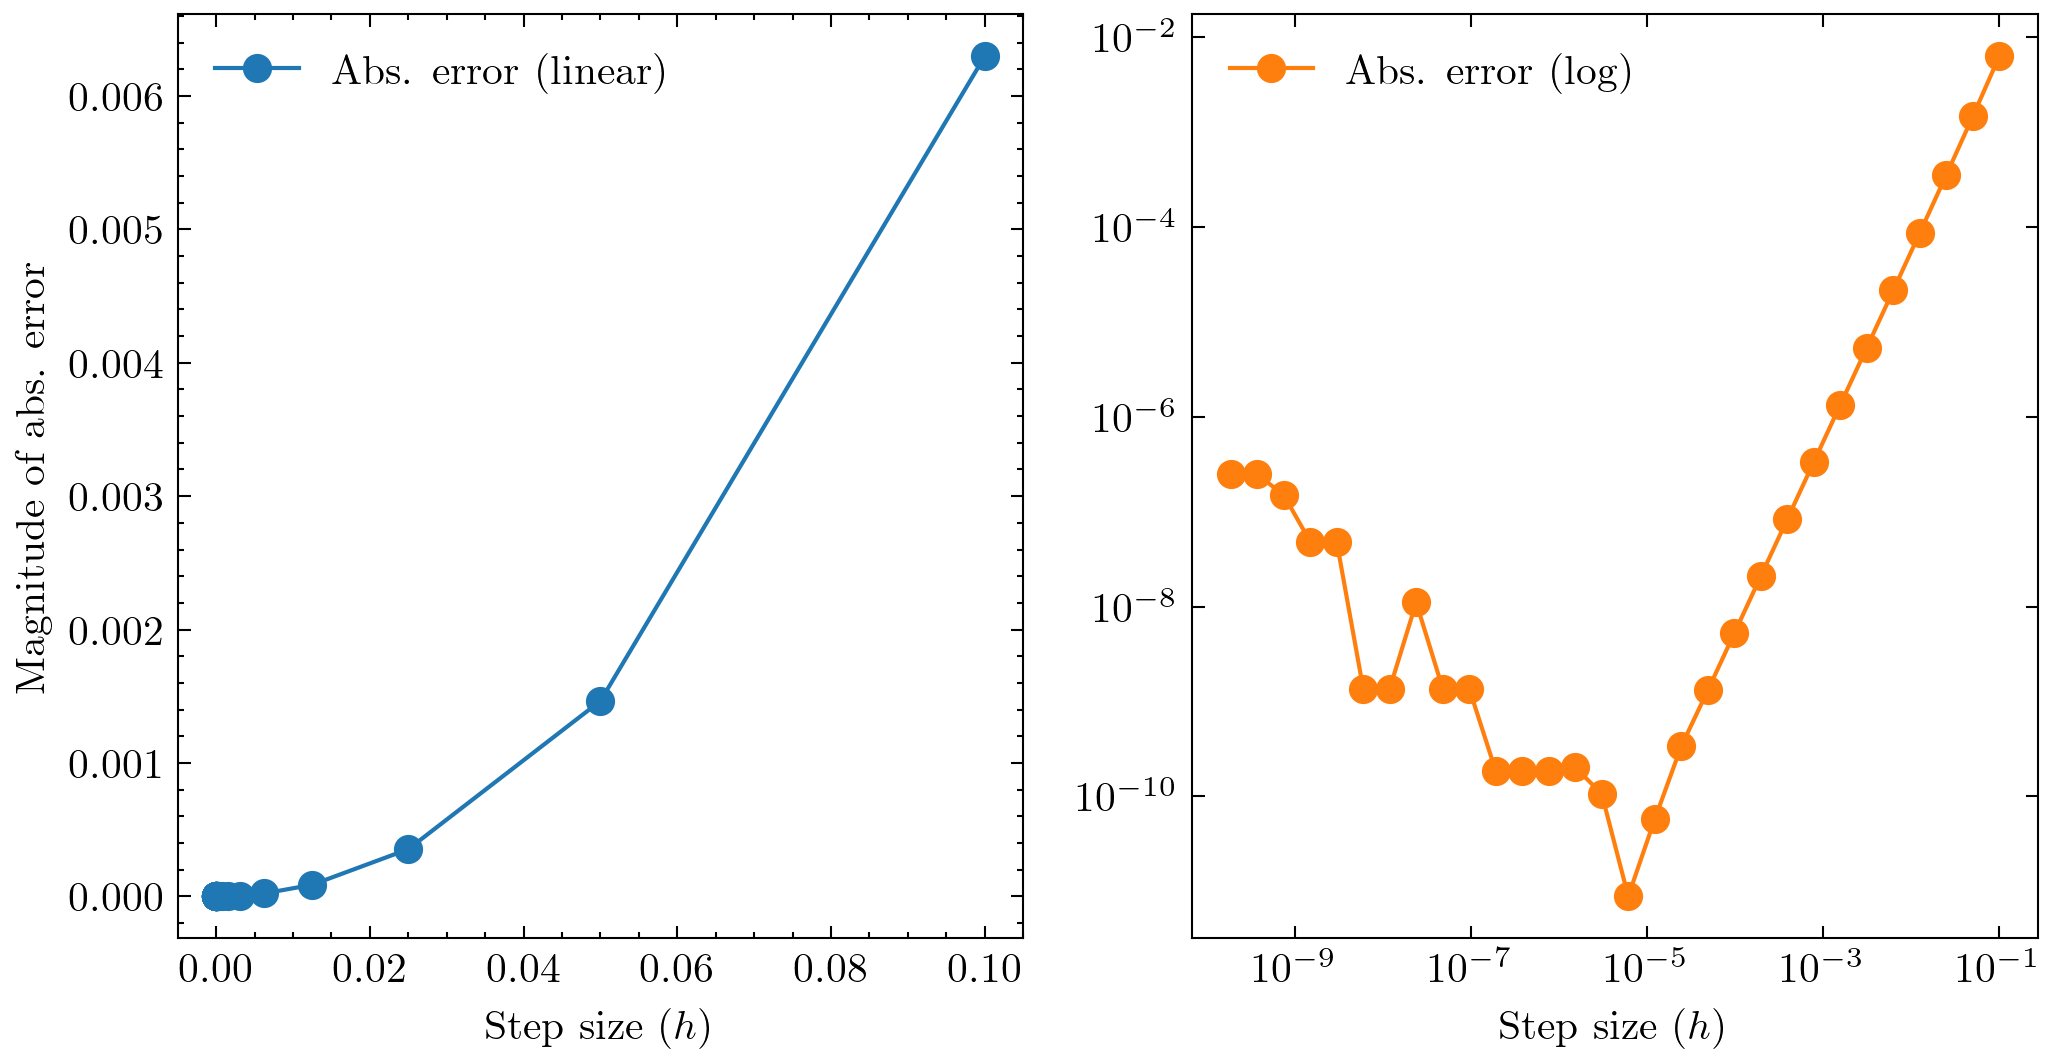

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# Plot the absolute error vs step size
# in both linear and logarithmic scales
ax[0].plot(h_values, abserror_values, color='tab:blue', label='Abs. error (linear)', marker='o')
ax[1].loglog(h_values, abserror_values, color='tab:orange', label='Abs. error (log)', marker='o')

# Formatting
ax[0].set_xlabel('Step size ($h$)')
ax[0].set_ylabel('Magnitude of abs. error')
ax[0].legend(loc='best')
ax[1].set_xlabel('Step size ($h$)')
ax[1].legend(loc='best')

plt.show()

The graph of the results is difficult to interpret (left), because the values of $h$ span many orders of magnitude. A clearer view is achieved by using logartihmic axes (right).

For $h$ larger than $10^{-5}$, the data appears to follow a quadratic scaling behavior, as expected for a second-order scheme. For $h$ smaller than $10^{-5}$ numerical roundoff errors dominate and the results become less accurate.

**Question**: Why does the absolute error increase once the step size decreases below $10^{-5}$?

### Fitting a power law model

In [4]:
# Only do fitting when h > 10^-5
h_fit = [h for h in h_values if h > 1e-5]
abserror_fit = abserror_values[:len(h_fit)]

# Perform the power law fit (log-log scale)
# y = a h^b —> log(y) = log(a) + b log(h)
log_h = np.log(h_fit)
log_error = np.log(abserror_fit)
coefficients = np.polyfit(log_h, log_error, 1)  # Linear fit in log-log space

# Print results
b, a = coefficients
print(f"Slope: {b}, Intercept: {a}")

Slope: 2.023069939420162, Intercept: -0.45054533598897534


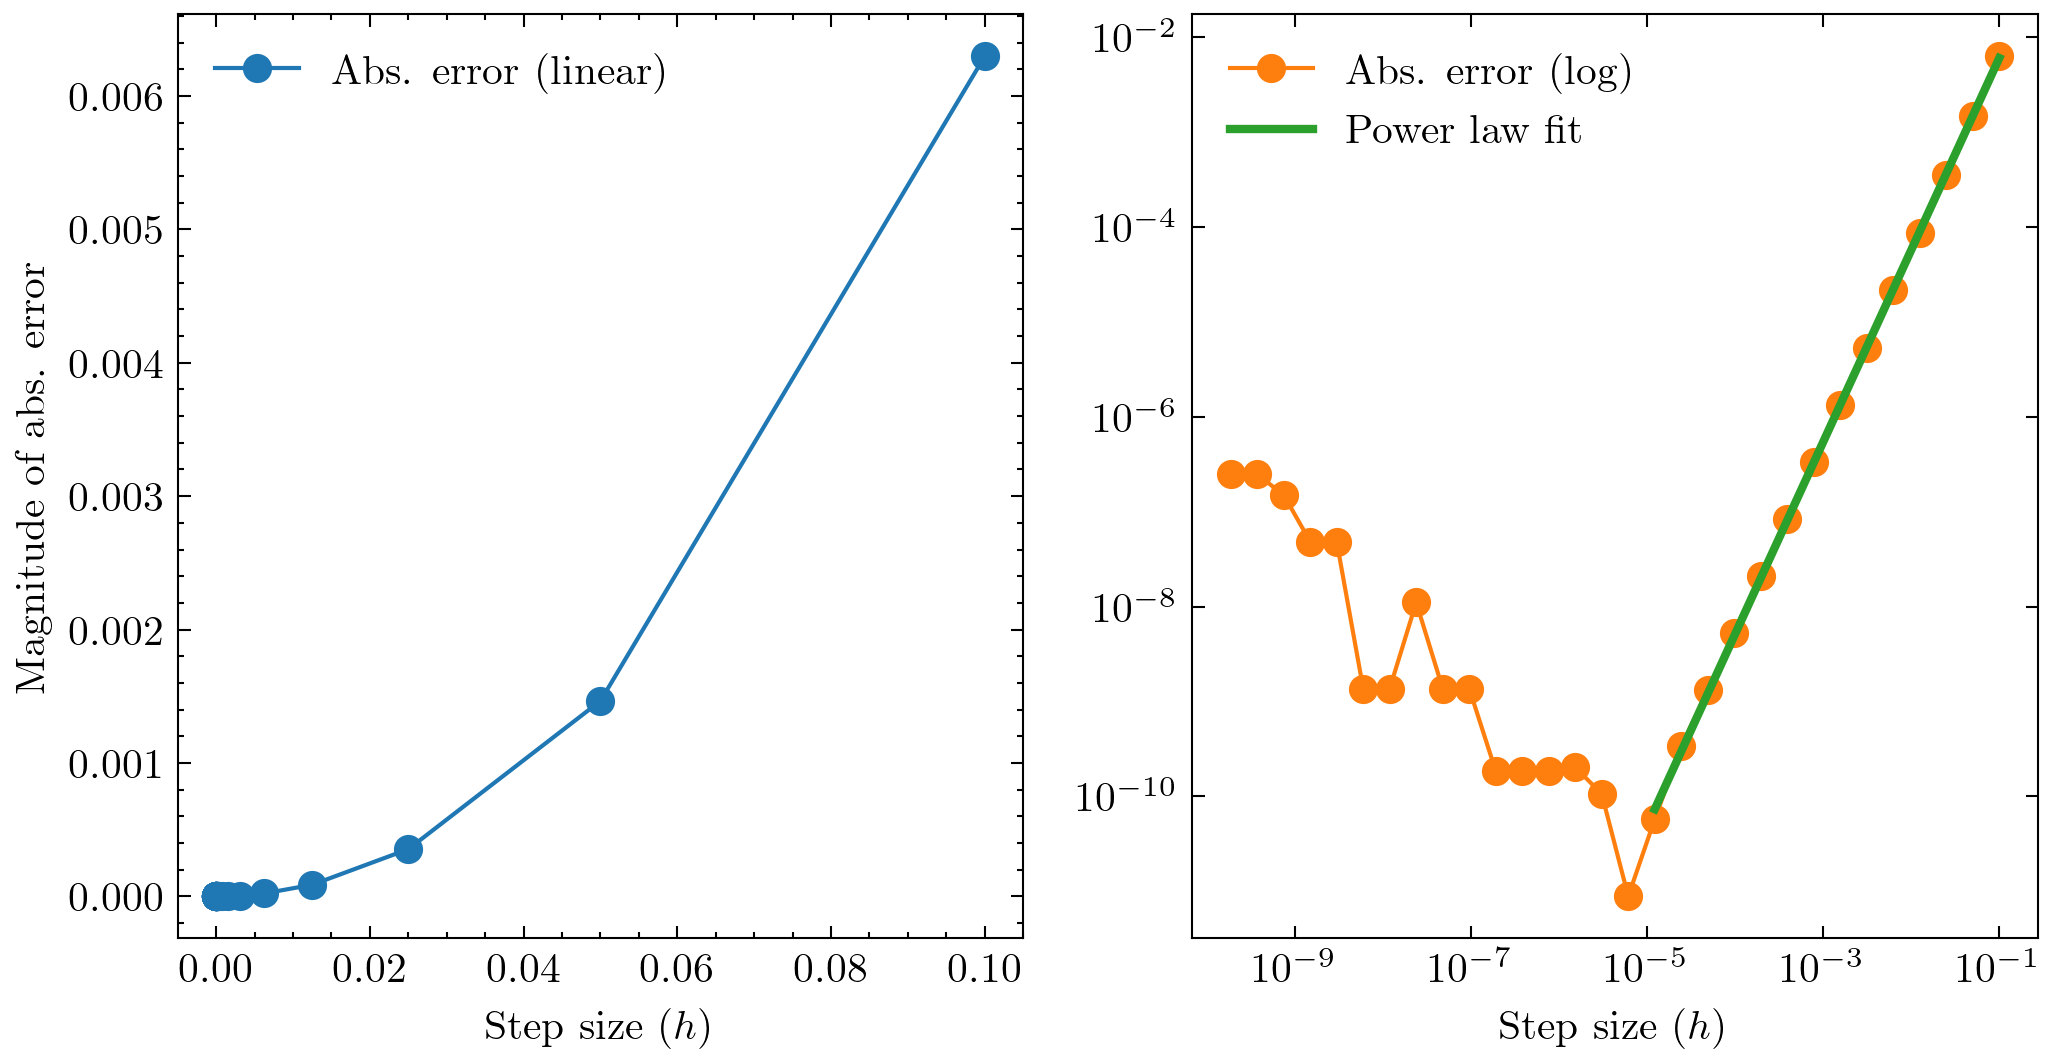

In [5]:
# Overlay the fitted power law
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# Plot the absolute error vs step size
# in both linear and logarithmic scales
ax[0].plot(h_values, abserror_values, color='tab:blue', label='Abs. error (linear)', marker='o')
ax[1].loglog(h_values, abserror_values, color='tab:orange', label='Abs. error (log)', marker='o')

# Add the overlay power law
# y_fit = exp(a + b log(h))
ax[1].plot(h_fit, np.exp(a + log_h * b), color='tab:green', label='Power law fit', lw=2)

# Formatting
ax[0].set_xlabel('Step size ($h$)')
ax[0].set_ylabel('Magnitude of abs. error')
ax[0].legend(loc='best')
ax[1].set_xlabel('Step size ($h$)')
ax[1].legend(loc='best')

plt.show()